In [135]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn
import pylab as plt

In [2]:
%matplotlib inline

In [3]:
open('USW00014922.dly','r').readlines()[:10]

['USW00014922193804TMAX-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999     106  0  189  0  172  0  217  0  256  0  194  0  117  0  133  0  228  0  217  0  172  0  144  0   89  0  144  0   94  0  111  0  156  0  267  0  256  0  156  0  144  0  222  0-9999   \n',
 'USW00014922193804TMIN-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999     -17  0   11  0   61  0   28  0   78  0   78  0   72  0  106  0  106  0   72  0   11  0   -6  0   17  0   -6  0   39  0   56  0   44  0  117  0  156  0   39  0   17  0   44  0-9999   \n',
 'USW00014922193804PRCP-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999       0  0    0  0    0  0    0  0    0  0  267  0   64  0  193  0   58  0    0  0    0T 0    3  0   25  0    0  0  119  0   10  0    0T 0    0  0   36  0   56  0    0  0    0  0-9999   \n',
 'USW00014922193804SNOW-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999       0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [4]:
open('readme.txt','r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

In [5]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [6]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [7]:
minneapolis = parsefile('USW00014922.dly')

In [8]:
minneapolis

array([(1938, 4, 'TMAX', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 106,   189,   172,   217,   256,   194,   117,   133,   228,   217,   172,   144,    89,   144,  94,   111,   156,   267,   256,   156,   144,   222, -9999),
       (1938, 4, 'TMIN', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -17,    11,    61,    28,    78,    78,    72,   106,   106,    72,    11,    -6,    17,    -6,  39,    56,    44,   117,   156,    39,    17,    44, -9999),
       (1938, 4, 'PRCP', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,   0,     0,     0,     0,     0,   267,    64,   193,    58,     0,     0,     3,    25,     0, 119,    10,     0,     0,    36,    56,     0,     0, -9999),
       ...,
       (2015, 9, 'WT01',     1,     1,     1,     1,     1,     1, -9999,     1,   1,     1, -9999, -9999, -9999, -9999, -9999, -9999,     1, -9999, -9999, -9999, -9999,     1,   1,     1,     1,     1, -9999, -9999, -9999, -9999, -9999),
       (2015, 9, 'WT03', -9999, 

In [9]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [10]:
unroll(minneapolis[0])

array([('1938-04-01', -999.9), ('1938-04-02', -999.9),
       ('1938-04-03', -999.9), ('1938-04-04', -999.9),
       ('1938-04-05', -999.9), ('1938-04-06', -999.9),
       ('1938-04-07', -999.9), ('1938-04-08', -999.9),
       ('1938-04-09',   10.6), ('1938-04-10',   18.9),
       ('1938-04-11',   17.2), ('1938-04-12',   21.7),
       ('1938-04-13',   25.6), ('1938-04-14',   19.4),
       ('1938-04-15',   11.7), ('1938-04-16',   13.3),
       ('1938-04-17',   22.8), ('1938-04-18',   21.7),
       ('1938-04-19',   17.2), ('1938-04-20',   14.4),
       ('1938-04-21',    8.9), ('1938-04-22',   14.4),
       ('1938-04-23',    9.4), ('1938-04-24',   11.1),
       ('1938-04-25',   15.6), ('1938-04-26',   26.7),
       ('1938-04-27',   25.6), ('1938-04-28',   15.6),
       ('1938-04-29',   14.4), ('1938-04-30',   22.2)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [11]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [20]:
minneapolis_tmax = getobs('USW00014922.dly','TMAX')

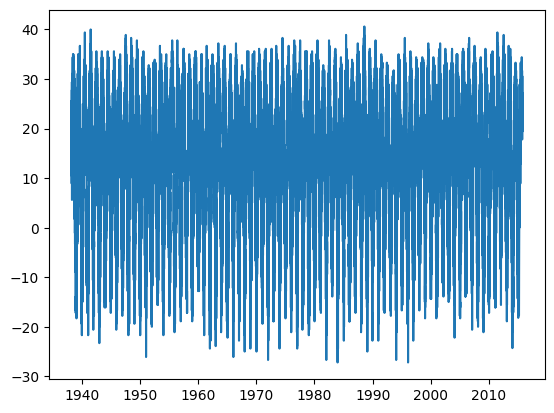

In [13]:
pp.plot(minneapolis_tmax['date'],minneapolis_tmax['value'])

In [14]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [22]:
fillnans(minneapolis_tmax)

In [52]:
np.mean(minneapolis_tmax['value']) 

12.74308121666019

In [17]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [56]:
year_list = range(1940, 2015)
start_year = 1940
minneapolis_mean = np.array([np.mean(selectyear(minneapolis_tmax,year)) for year in year_list])
minneapolis_mean

array([11.8068306 , 13.82547945, 12.75561644, 11.87452055, 13.08169399,
       11.6430137 , 13.43260274, 12.54328767, 13.31857923, 13.54219178,
       10.8569863 , 10.44876712, 12.75846995, 13.64356164, 12.78493151,
       12.96191781, 12.62131148, 12.49863014, 13.10438356, 12.94986301,
       12.15218579, 12.48767123, 11.22136986, 12.85616438, 13.2715847 ,
       11.0890411 , 11.89205479, 11.47780822, 12.54699454, 12.27178082,
       12.07945205, 12.01835616, 10.24453552, 13.11643836, 12.26849315,
       12.26465753, 13.80546448, 12.65945205, 12.21123288, 11.47726027,
       12.84562842, 13.33589041, 12.05726027, 12.1709589 , 12.2204918 ,
       11.75835616, 12.51917808, 15.14986301, 13.79180328, 12.12493151,
       14.04356164, 12.83013699, 12.20355191, 11.29589041, 12.78767123,
       12.55753425, 11.11420765, 12.08328767, 14.54383562, 14.02438356,
       12.84644809, 13.54109589, 12.88109589, 12.93671233, 12.83415301,
       13.77972603, 14.43068493, 13.70465753, 12.04535519, 12.33

In [103]:
minneapolis_warmest = np.argmax(minneapolis_mean) + start_year
minneapolis_warmest

2012

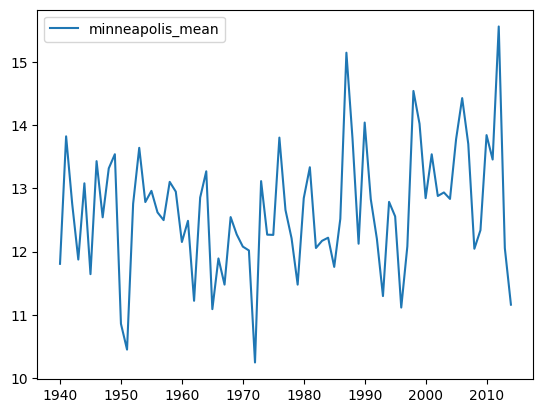

In [104]:
pp.plot(year_list, minneapolis_mean, label="minneapolis_mean")
pp.legend(loc="best")

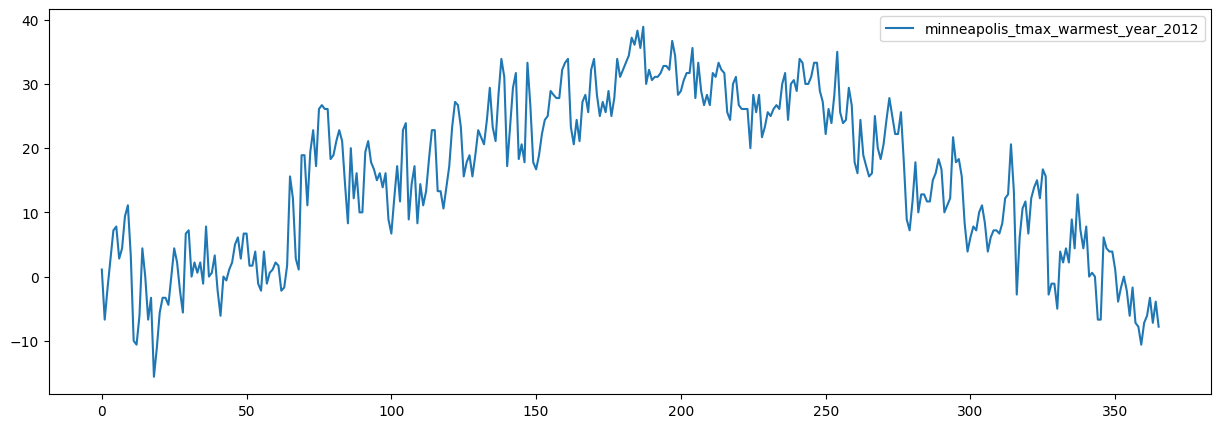

In [106]:
minneapolis_warmest_to_plot = np.array(selectyear(minneapolis_tmax, minneapolis_warmest))
pp.figure(figsize=(15,5))
pp.plot(minneapolis_warmest_to_plot, label="minneapolis_tmax_warmest_year_2012")
pp.legend(loc="best")

In [80]:
open('USW00023188.dly','r').readlines()[:10]

['USW00023188193907TMAX  244  0  233  0  217  0  217  0  222  0  222  0  239  0  239  0  244  0  244  0  267  0  261  0  228  0  233  0  217  0  211  0  206  0  222  0  233  0  233  0  250  0  244  0  244  0  256  0  261  0  256  0  239  0  250  0  239  0  244  0  244  0\n',
 'USW00023188193907TMIN  172  0  183  0  167  0  172  0  178  0  183  0  161  0  172  0  183  0  183  0  172  0  178  0  172  0  167  0  156  0  150  0  156  0  167  0  156  0  189  0  172  0  178  0  178  0  183  0  194  0  178  0  178  0  172  0  183  0  183  0  189  0\n',
 'USW00023188193907PRCP    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0T 0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0\n',
 'USW00023188193907SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [81]:
san_diego = parsefile('USW00023188.dly')
san_diego

array([(1939, 7, 'TMAX',   244,   233,   217,   217,   222,   222,   239,   239,   244,   244,   267,   261,   228,   233, 217,   211,   206,   222,   233,   233,   250,   244,   244,   256,   261,   256,   239,   250,   239,   244,   244),
       (1939, 7, 'TMIN',   172,   183,   167,   172,   178,   183,   161,   172,   183,   183,   172,   178,   172,   167, 156,   150,   156,   167,   156,   189,   172,   178,   178,   183,   194,   178,   178,   172,   183,   183,   189),
       (1939, 7, 'PRCP',     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,   0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0),
       ...,
       (2015, 9, 'WSF5',    72,    76,    76,    81,    81,    76,    81,    94,   103,    72,    58,    72,    63,    76, 125,    76,    81, -9999,    63,    98,    89,    67,    76,    67,    67,    63, -9999, -9999, -9999, -9999, -9999),
       (2015, 9, 'WT01',

In [82]:
unroll(san_diego[0])

array([('1939-07-01', 24.4), ('1939-07-02', 23.3), ('1939-07-03', 21.7),
       ('1939-07-04', 21.7), ('1939-07-05', 22.2), ('1939-07-06', 22.2),
       ('1939-07-07', 23.9), ('1939-07-08', 23.9), ('1939-07-09', 24.4),
       ('1939-07-10', 24.4), ('1939-07-11', 26.7), ('1939-07-12', 26.1),
       ('1939-07-13', 22.8), ('1939-07-14', 23.3), ('1939-07-15', 21.7),
       ('1939-07-16', 21.1), ('1939-07-17', 20.6), ('1939-07-18', 22.2),
       ('1939-07-19', 23.3), ('1939-07-20', 23.3), ('1939-07-21', 25. ),
       ('1939-07-22', 24.4), ('1939-07-23', 24.4), ('1939-07-24', 25.6),
       ('1939-07-25', 26.1), ('1939-07-26', 25.6), ('1939-07-27', 23.9),
       ('1939-07-28', 25. ), ('1939-07-29', 23.9), ('1939-07-30', 24.4),
       ('1939-07-31', 24.4)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [83]:
san_diego_tmin = getobs('USW00023188.dly','TMIN')

In [85]:
fillnans(san_diego_tmin)
san_diego_tmin

array([('1939-07-01', 17.2), ('1939-07-02', 18.3), ('1939-07-03', 16.7),
       ..., ('2015-09-28', 21.7), ('2015-09-29', 21.7),
       ('2015-09-30', 21.7)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [86]:
san_diego_mean = np.array([np.mean(selectyear(san_diego_tmin,year)) for year in year_list])
san_diego_mean

array([13.36120219, 13.33753425, 12.46356164, 12.86931507, 12.0363388 ,
       12.68109589, 12.81534247, 12.64493151, 11.65327869, 12.16657534,
       12.72684932, 12.90739726, 12.75191257, 12.87671233, 13.33068493,
       12.90712329, 13.00819672, 14.01452055, 14.33506849, 14.75068493,
       13.2431694 , 13.30767123, 12.72273973, 13.15342466, 12.53032787,
       12.93726027, 13.53287671, 13.4709589 , 13.94562842, 14.03945205,
       14.17616438, 13.37232877, 13.90218579, 13.83589041, 13.95452055,
       13.20986301, 15.01038251, 15.11479452, 15.6539726 , 15.02931507,
       15.28661202, 16.17452055, 14.92410959, 16.23315068, 16.36967213,
       14.59561644, 14.14      , 13.8109589 , 13.85546448, 13.80273973,
       13.98465753, 13.5169863 , 14.86202186, 14.23671233, 13.69643836,
       14.31835616, 14.83770492, 15.1230137 , 14.13123288, 13.40273973,
       14.41693989, 13.93890411, 13.73917808, 14.53835616, 15.07786885,
       14.73643836, 14.76273973, 13.99506849, 14.14344262, 14.42

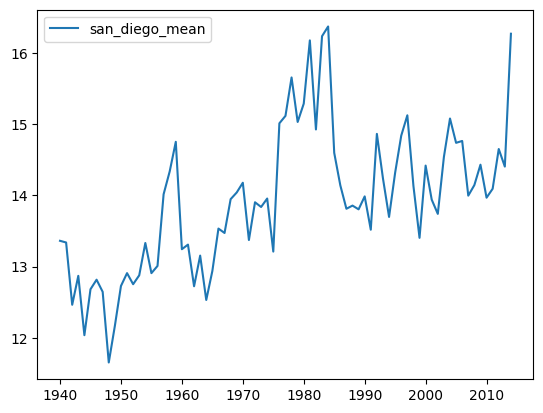

In [88]:
pp.plot(year_list, san_diego_mean, label="san_diego_mean")
pp.legend(loc="best")

In [90]:
san_diego_coldest = np.argmin(san_diego_mean) + start_year
san_diego_coldest

1948

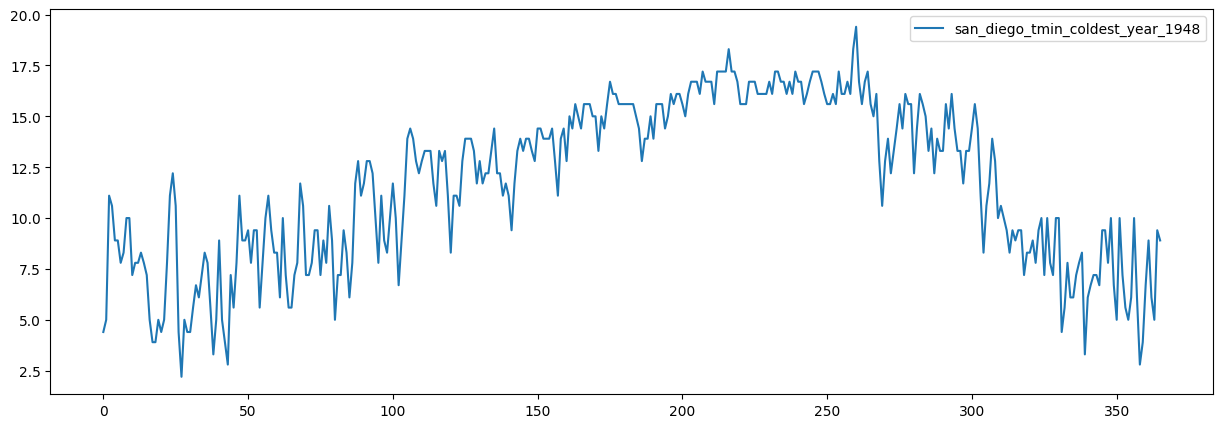

In [108]:
san_diego_coldest_to_plot = np.array(selectyear(san_diego_tmin, san_diego_coldest))
pp.figure(figsize=(15,5))
pp.plot(san_diego_coldest_to_plot, label="san_diego_tmin_coldest_year_1948")
pp.legend(loc="best")

In [109]:
minneapolis_tmin = getobs('USW00014922.dly','TMIN')
fillnans(minneapolis_tmin)
minneapolis_coldest_to_plot = np.array(selectyear(minneapolis_tmin, minneapolis_warmest))

In [121]:
san_diego_tmax = getobs('USW00023188.dly','TMAX')
fillnans(san_diego_tmax)
san_diego_warmest_to_plot = np.array(selectyear(san_diego_tmax, san_diego_coldest))


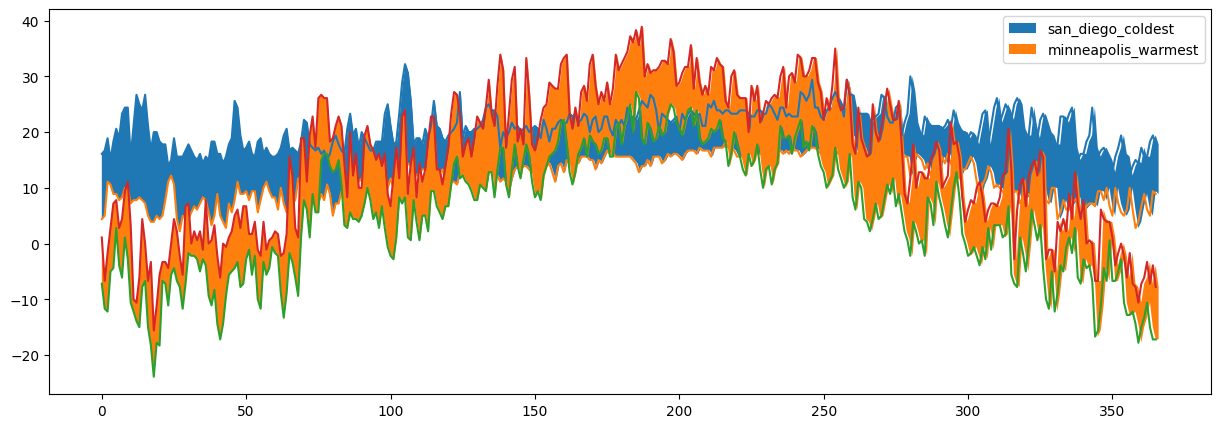

In [144]:
pp.figure(figsize=(15,5))
x = np.linspace(0,366,366)
pp.plot(san_diego_warmest_to_plot)
pp.plot(san_diego_coldest_to_plot)
pp.plot(minneapolis_coldest_to_plot)
pp.plot(minneapolis_warmest_to_plot)
pp.fill_between(x, san_diego_warmest_to_plot, san_diego_coldest_to_plot, label="san_diego_coldest")
pp.fill_between(x, minneapolis_warmest_to_plot, minneapolis_coldest_to_plot, label="minneapolis_warmest")
pp.legend(loc="best")